<a href="https://colab.research.google.com/github/igoorsa/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 64)
pd.set_option('display.max_rows', 64)
dados = pd.read_csv('/content/Data_train_reduced.csv')
dados.head()

,Respondent.ID,Product.ID,Product,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.7,q8.8,q8.9,q8.10,q8.11,q8.12,q8.13,q8.17,q8.18,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
0,3800,121,Deodorant B,1,4,1,4,2,5,4,2,3,5,5,5,4,5,3,1,5,1,2,4,5,4,5,1,1,4,1,4,1,1,0,0.0,0,0,NaN,1.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,2,1,1,2,1,7,7,4,1,4,3,1,1,0.0,0,3
1,3801,121,Deodorant B,0,5,1,4,4,2,2,1,3,2,4,4,4,3,1,1,3,4,4,5,3,3,4,2,2,5,4,4,4,4,0,0.0,0,1,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,3,5,3,3,3,8,6,4,1,4,3,1,1,0.0,0,4
2,3802,121,Deodorant B,0,6,1,3,2,5,2,4,2,4,3,5,4,4,4,3,1,2,1,4,2,4,3,2,5,4,4,3,4,3,0,0.0,0,0,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,5,1,3,3,2,5,7,4,1,3,5,1,1,0.0,0,2
3,3803,121,Deodorant B,1,4,0,4,5,5,4,3,5,2,5,3,5,5,5,1,4,3,3,5,5,4,2,5,3,3,5,4,4,3,0,0.0,0,0,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,5,4,1,3,6,8,1,4,1,4,9,1,3,0.0,0,3
4,3804,121,Deodorant B,1,4,1,2,1,3,1,1,3,3,5,3,5,5,5,1,4,4,2,3,5,1,2,4,2,3,1,5,3,2,0,0.0,0,0,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,5,3,3,2,5,4,4,4,1,3,5,1,2,0.0,0,3


In [3]:
dados.dtypes

Respondent.ID                                                int64
Product.ID                                                   int64
Product                                                     object
Instant.Liking                                               int64
q1_1.personal.opinion.of.this.Deodorant                      int64
q2_all.words                                                 int64
q3_1.strength.of.the.Deodorant                               int64
q4_1.artificial.chemical                                     int64
q4_2.attractive                                              int64
q4_3.bold                                                    int64
q4_4.boring                                                  int64
q4_5.casual                                                  int64
q4_6.cheap                                                   int64
q4_7.clean                                                   int64
q4_8.easy.to.wear                                            i

In [4]:
dados.drop('Product', axis=1, inplace=True)

In [5]:
dados.isnull().sum()/len(dados['Instant.Liking'])*100

Respondent.ID                                               0.0
Product.ID                                                  0.0
Instant.Liking                                              0.0
q1_1.personal.opinion.of.this.Deodorant                     0.0
q2_all.words                                                0.0
q3_1.strength.of.the.Deodorant                              0.0
q4_1.artificial.chemical                                    0.0
q4_2.attractive                                             0.0
q4_3.bold                                                   0.0
q4_4.boring                                                 0.0
q4_5.casual                                                 0.0
q4_6.cheap                                                  0.0
q4_7.clean                                                  0.0
q4_8.easy.to.wear                                           0.0
q4_9.elegant                                                0.0
q4_10.feminine                          

In [6]:
dados.drop('q8.20', axis= 1, inplace = True)
dados.drop('q8.18', axis= 1, inplace = True)
dados.drop('q8.17', axis= 1, inplace = True)
dados.drop('q8.10', axis= 1, inplace = True)
dados.drop('q8.8', axis= 1, inplace = True)
dados.drop('q8.9', axis= 1, inplace = True)
dados.drop('q8.2', axis= 1, inplace = True)
dados.drop('Respondent.ID', axis= 1, inplace = True)
dados.drop('q1_1.personal.opinion.of.this.Deodorant', axis= 1, inplace = True) # exlcuindo pois ela da 100 de score para o modelo

dados['q8.12'].fillna(dados['q8.12'].median(), inplace = True)
dados['q8.7'].fillna(dados['q8.7'].median(), inplace = True)

dados.isnull().sum()/len(dados['Instant.Liking'])*100

Product.ID                                                 0.0
Instant.Liking                                             0.0
q2_all.words                                               0.0
q3_1.strength.of.the.Deodorant                             0.0
q4_1.artificial.chemical                                   0.0
q4_2.attractive                                            0.0
q4_3.bold                                                  0.0
q4_4.boring                                                0.0
q4_5.casual                                                0.0
q4_6.cheap                                                 0.0
q4_7.clean                                                 0.0
q4_8.easy.to.wear                                          0.0
q4_9.elegant                                               0.0
q4_10.feminine                                             0.0
q4_11.for.someone.like.me                                  0.0
q4_12.heavy                                            

<Axes: >

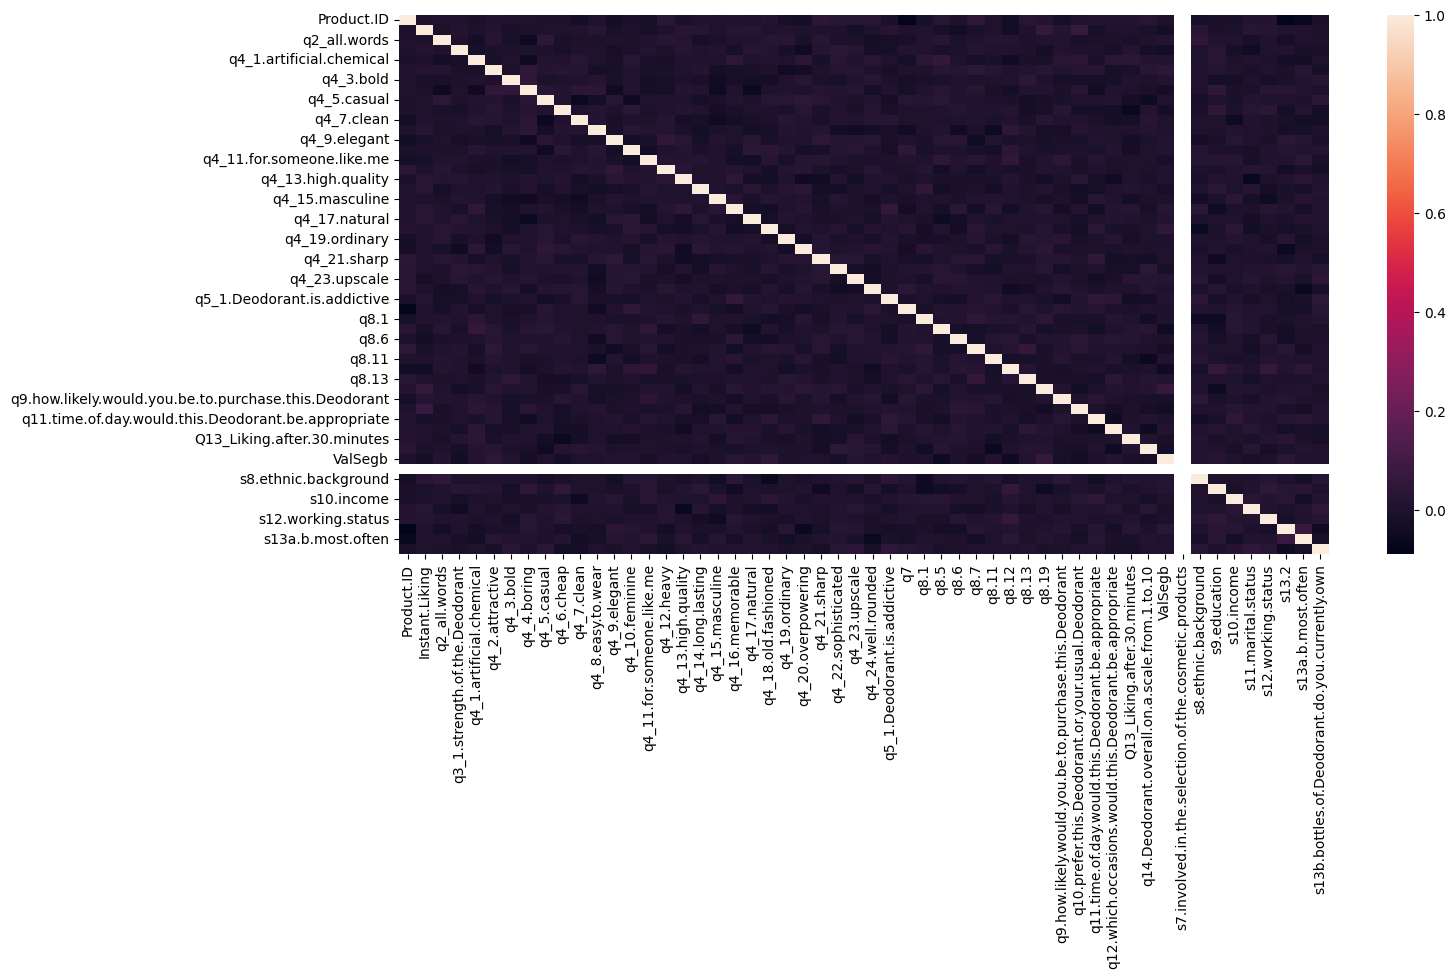

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(dados.corr())

In [8]:
dados.drop('s7.involved.in.the.selection.of.the.cosmetic.products', axis = 1, inplace = True)

<Axes: >

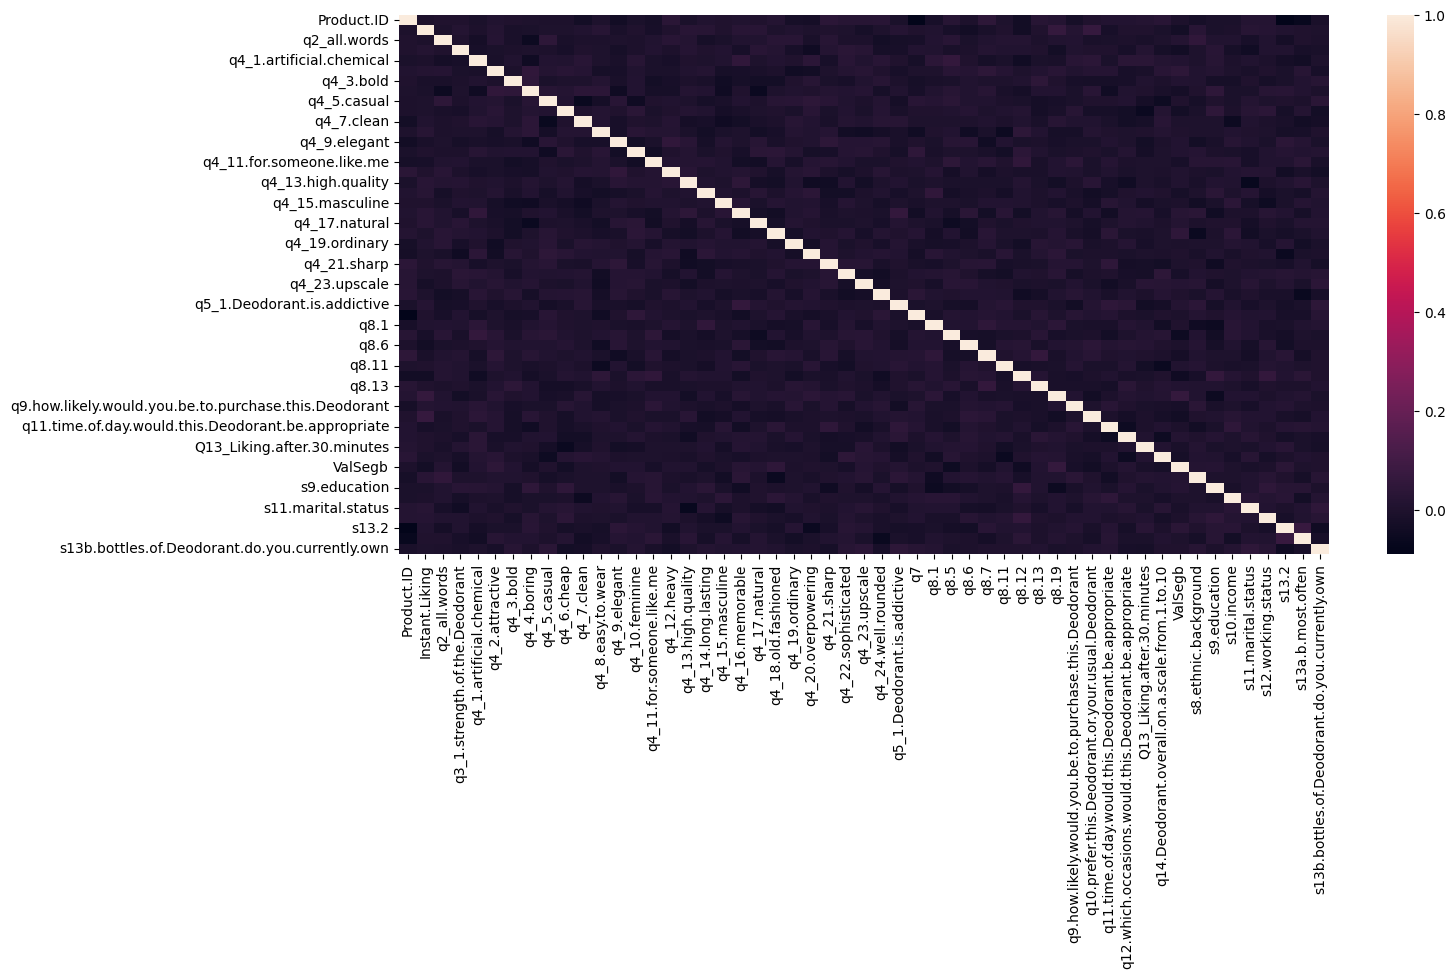

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(dados.corr())

In [10]:
x = dados.drop('Instant.Liking', axis = 1)
y = dados['Instant.Liking']

In [13]:
modelo = LogisticRegression(penalty = 'l2', solver='liblinear')
SKFold = StratifiedKFold()

resultado = cross_val_score(modelo,x,y, cv= SKFold)

In [23]:
resultado.mean()

0.7524000000000001

In [27]:
val_penalty = ['l2','l1','elasticnet']
val_c = [0.1,0.2,0.5,1,2,5,7,10,16]
val_solv = ['sag', 'saga', 'liblinear']
valores = {'penalty': val_penalty,'C':val_c, 'solver':val_solv}

In [29]:
result_grid = GridSearchCV(modelo, valores,cv=5)
result_grid.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 5, 7, 10, 16],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear']})

In [35]:
print('o melhor resultado foi:', result_grid.best_score_)
print('com os seguintes parametros:')
print('penalty:', result_grid.best_estimator_.penalty)
print('C:', result_grid.best_estimator_.C)
print('solver:', result_grid.best_estimator_.solver)

o melhor resultado foi: 0.7544
com os seguintes parametros:
penalty: l1
C: 0.5
solver: liblinear
